# 1. Introduction

### The automotive industry generates a vast amount of data related to vehicles, sales, and customer preferences. This project focuses on analyzing a Toyota dataset obtained from Kaggle, which contains information about Toyota car models, their specifications, and other relevant features such as price, age, fuel type, and mileage.

### The main objective of this project is to preprocess the data and prepare it for machine learning tasks, such as predicting car prices or identifying trends in the used car market. Proper preprocessing is essential because real-world datasets often contain missing values, inconsistent formats, outliers, and mixed feature types, which can negatively affect the performance of predictive models.

### By cleaning, transforming, and engineering the features in this dataset, this project aims to create a structured and ML-ready dataset, allowing for more accurate and reliable analysis and predictions

# 2. Dataset Overview

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Toyota.csv')

print(df.shape)
print(df.info())
print(df.head())
print(df.tail())
print(df.describe())


(1436, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB
None
   Unnamed: 0  Price   Age     KM FuelType  HP  MetColor  Automatic    CC  \
0           0  13500  23.0  46986   Diesel  90       1.0          0  2000   
1           1  13750  23.0  72937   Diesel  90       1.0          0  2000   
2           2  13950  24.0  41711   Diesel  90   

### The Toyota dataset contains 1436 records and 11 features representing different attributes of Toyota cars. It is a mix of numeric and categorical data and includes some missing values that need attention during preprocessing.

### The target variable is Price, which represents the selling price of the car. The dataset also includes the car’s Age, KM driven, FuelType, Horsepower (HP), whether it has a metallic color (MetColor), the transmission type (Automatic), engine capacity (CC), number of doors (Doors), and the weight of the car (Weight). There is also an Unnamed: 0 column, which is simply an index and can be removed.

### Some columns contain missing values: Age and FuelType each have 100 missing entries, while MetColor has 150 missing entries. This indicates that some data cleaning and imputation will be required.

### Certain columns, such as KM and HP, are stored as objects even though they represent numeric values. These will need to be converted into numeric types for analysis. Other features, like FuelType and Doors, are categorical and will require encoding before applying machine learning models.

### Overall, the dataset provides a good mix of numeric and categorical features that describe the cars, but it requires cleaning, type conversions, handling missing values, and potential feature scaling to be ready for machine learning tasks such as predicting car prices or analyzing patterns in the used car market.

# 

# 3. Data integration

### Since we have only one dataset file so we need not do any integration

# 4. Data cleaning

Special characters found in column 'KM':
      Price   Age  KM FuelType    HP  MetColor  Automatic    CC Doors  Weight
6     16900  27.0  ??   Diesel  ????       NaN          0  2000     3    1245
64    17950  27.0  ??   Petrol    97       1.0          0  1400     5    1110
91    22250  20.0  ??   Diesel    90       1.0          0  2000     3    1260
112   24950   8.0  ??   Diesel   116       1.0          0  2000     5    1320
125   21750  16.0  ??   Petrol   110       1.0          0  1600     5    1130
131   15950  20.0  ??   Petrol    97       1.0          0  1400     5    1110
398   10500  55.0  ??   Petrol   110       1.0          0  1600     4    1035
491   10750  54.0  ??   Petrol   110       1.0          0  1600     5    1075
1049   6750  77.0  ??   Diesel    72       1.0          0  2000     4    1100
1120   7350  72.0  ??   Petrol    86       1.0          0  1300     3    1015
1421   8500  78.0  ??   Petrol    86       0.0          1  1300     3    1045
1425   7950  80.0  ??  

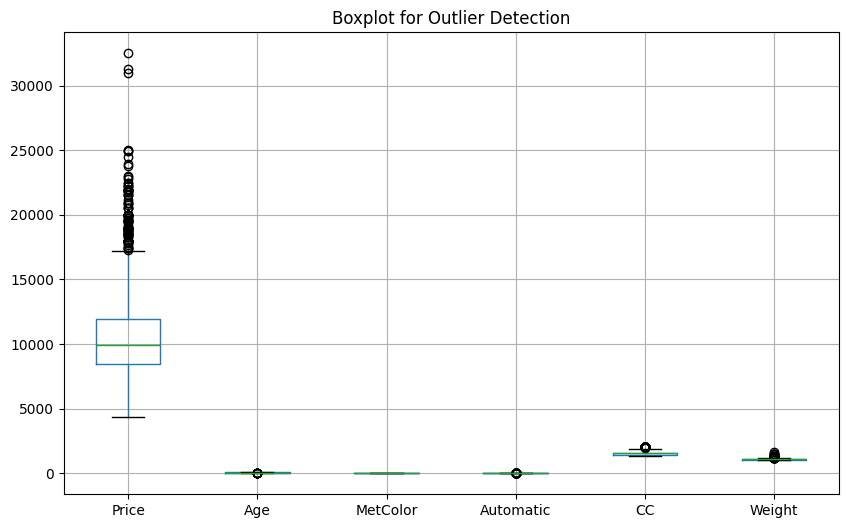

(1436, 10)
Index(['Price', 'Age', 'MetColor', 'Automatic', 'CC', 'Weight'], dtype='object')
(1129, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, 9 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1129 non-null   int64  
 1   Age        1129 non-null   float64
 2   KM         1129 non-null   object 
 3   FuelType   1129 non-null   object 
 4   HP         1129 non-null   object 
 5   MetColor   1129 non-null   float64
 6   Automatic  1129 non-null   int64  
 7   CC         1129 non-null   int64  
 8   Doors      1129 non-null   object 
 9   Weight     1129 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 97.0+ KB
    Price   Age     KM FuelType   HP  MetColor  Automatic    CC Doors  Weight
9   12950  23.0  71138   Diesel  110       1.0          0  1900     3    1105
18  16750  24.0  25563   Petrol  110       0.0          0  1600     3    1065
19  16950  30.0  6

In [4]:
# Remove Unnecessary Columns
df = df.drop(columns=['Unnamed: 0'])

# Handle Special Characters / Dirty Data
for col in df.select_dtypes(include=['object']).columns:
    rows = df[df[col].str.contains(r'[^a-zA-Z0-9 ]', na=False)]
    if not rows.empty:
        print(f"Special characters found in column '{col}':")
        print(rows)
df['KM'] = df['KM'].replace('??', np.nan)
df['HP'] = df['HP'].replace('????', np.nan)

# Handling the missing values
print(df.isnull().sum())
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['MetColor'].fillna(df['MetColor'].median(), inplace=True)
df['FuelType'].fillna(df['FuelType'].mode()[0], inplace=True)
df['KM'].fillna(df['KM'].mode()[0], inplace=True)
df['HP'].fillna(df['HP'].mode()[0], inplace=True)
print(df.isnull().sum())

# Remove Duplicates
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

# Remove Outliers
plt.figure(figsize=(10,6))
df.select_dtypes(include=['int64','float64']).boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()

print(df.shape)

num_col = df.select_dtypes(include=['int64', 'float64']).columns
print(num_col)

def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    high = q3 + 1.5 * iqr
    low = q1 - 1.5 * iqr
    df_cleaned = df[(df[col] >= low) & (df[col] <= high)]
    return df_cleaned

for col in num_col:
    df = remove_outliers(df, col)

print(df.shape)

# Final check
df.info()
df.isnull().sum()
print(df.head())

# 4. Data Transformation

In [8]:
# 1. Encoding categorial data
from sklearn.preprocessing import LabelEncoder

print(df.dtypes)

cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

for col in cat_cols:
  Le = LabelEncoder()
  df[col]=Le.fit_transform(df[col])

print(df.dtypes)

# 2. Normalization of the data

print(df.head())
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print(df_scaled.head())



Price          int64
Age          float64
KM             int64
FuelType       int64
HP             int64
MetColor     float64
Automatic      int64
CC             int64
Doors          int64
Weight         int64
dtype: object
Index([], dtype='object')
Price          int64
Age          float64
KM             int64
FuelType       int64
HP             int64
MetColor     float64
Automatic      int64
CC             int64
Doors          int64
Weight         int64
dtype: object
    Price   Age   KM  FuelType  HP  MetColor  Automatic    CC  Doors  Weight
9   12950  23.0  726         1   0       1.0          0  1900      1    1105
18  16750  24.0  200         2   0       0.0          0  1600      1    1065
19  16950  30.0  640         2   0       1.0          0  1600      1    1105
20  15950  30.0  686         2   0       1.0          0  1600      1    1105
22  15950  28.0  522         2   0       1.0          0  1600      1    1120
      Price       Age        KM  FuelType   HP  MetColor  Automa

# 5. Data Reduction

Correlation with Price:
 Price        1.000000
Weight       0.433879
Doors        0.169156
CC           0.105245
MetColor     0.094248
HP           0.054061
FuelType     0.030257
KM          -0.175898
Age         -0.807088
Automatic         NaN
Name: Price, dtype: float64
RFE Selected Features: Index(['Age', 'FuelType', 'MetColor', 'Doors', 'Weight'], dtype='object')
Random Forest Feature Importances:
 Age          0.736622
KM           0.120947
Weight       0.085505
CC           0.018997
MetColor     0.013743
HP           0.009514
Doors        0.008284
FuelType     0.006389
Automatic    0.000000
dtype: float64


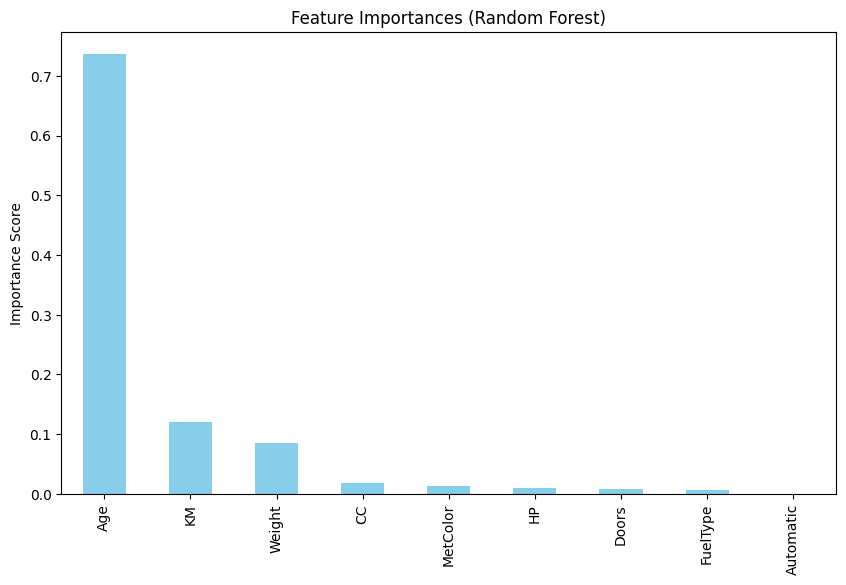

In [9]:
# 1. Features selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


X = df.drop('Price', axis=1)
y = df['Price']


for col in X.select_dtypes(include='object').columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

X = X.fillna(X.median())

# 1️ Correlation with Price
corr = pd.concat([X, y], axis=1).corr()['Price'].sort_values(ascending=False)
print("Correlation with Price:\n", corr)

# 2️ Wrapper Method - RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # select top 5 features
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("RFE Selected Features:", selected_features)

# 3️ Embedded Method - Random Forest Feature Importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Random Forest Feature Importances:\n", importances)

# Plotting feature importances
plt.figure(figsize=(10,6))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.show()



In [ ]:
# Selected features
selected_features = ['Age', 'Weight', 'MetColor']
# Include the target column
columns_to_keep = selected_features + ['Price']
# Update the original df to keep only selected columns
df = df[columns_to_keep]
# Display first few rows
print(df.head())




     Age  Weight  MetColor  Price
9   23.0    1105       1.0  12950
18  24.0    1065       0.0  16750
19  30.0    1105       1.0  16950
20  30.0    1105       1.0  15950
22  28.0    1120       1.0  15950


# Saving the cleaned dataset

In [11]:
# Save the DataFrame to a CSV file
df.to_csv("toyota_cleaned_dataset.csv", index=False)

print("Dataset saved successfully!")


Dataset saved successfully!


# Conclusion

### In this project, the Toyota dataset was preprocessed and reduced using feature selection to prepare it for machine learning tasks. Key points include:

### Data Cleaning: Handled missing values, removed irrelevant columns, and converted data types.

### Feature Selection as Dimensionality Reduction:

### RFE and Random Forest identified the most predictive features.

### Only Age, Weight, and MetColor were retained, reducing dataset complexity.

### Train-Test Split: The dataset can be split into 80% training and 20% testing sets for model evaluation.

### This pipeline resulted in a clean, simplified, and ML-ready dataset, demonstrating that feature selection can effectively serve as dimensionality reduction by keeping only the most informative variables. The dataset is now ready for modeling and further analysis.